Chelsea Seydlitz  
Partner: Michael Wang  
Physics 434
LAB 6

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal

# Setup
We must first create a Poisson-distributed background where $\mu$=100. 

Note that the distribution does appear Gaussian. This is due to the known fact that a Poisson distribution will appear Gaussian as $\mu$ gets large.

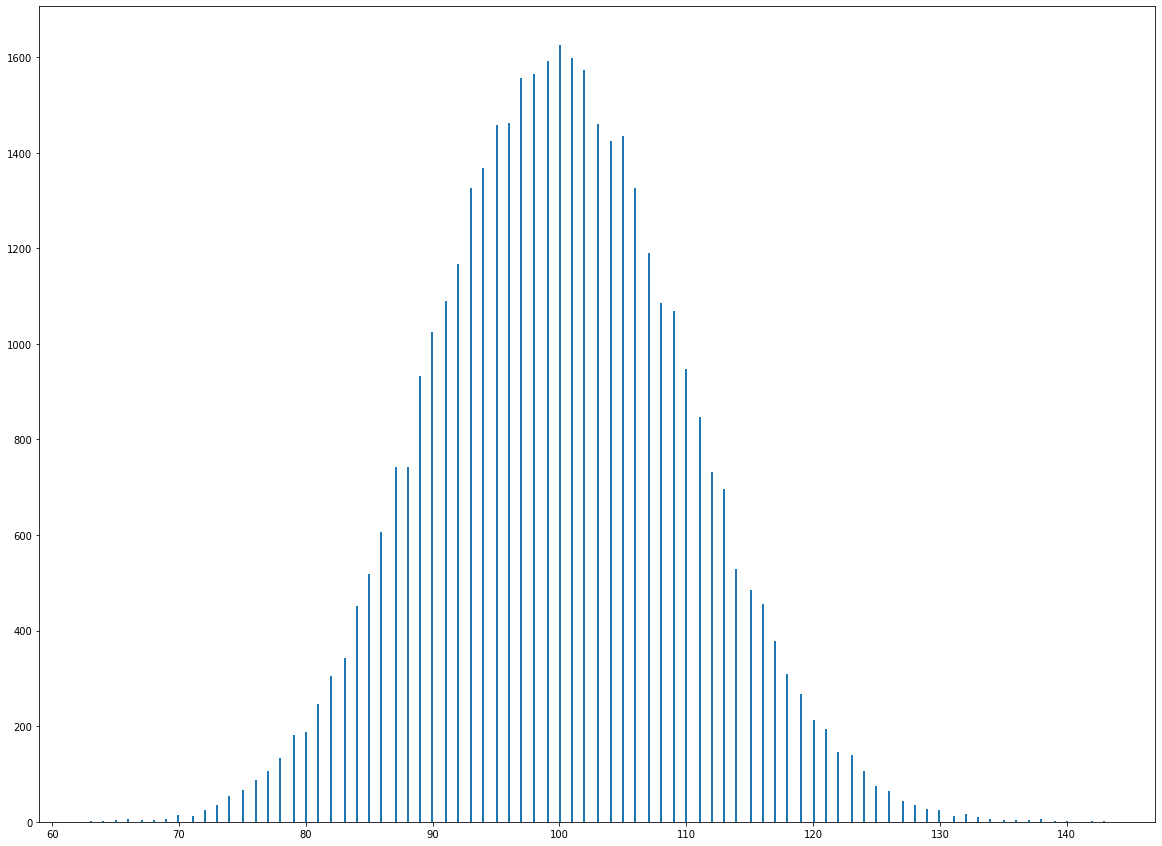

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
mu1=100
dist=np.random.poisson(mu1,40000)
ax.hist(dist,bins=500)
plt.show()

# Problem 1
## Determine where 5$\sigma$ sensitivity threshold is



In [143]:
prob=stats.poisson.cdf(154, mu=mu1)
ppf = stats.norm.ppf(prob)
print(ppf)

5.057503505878237


Based on the above, a signal of approximately 154 gives a 5$\sigma$ value, and a signal of approximately 46 gives a -5$\sigma$ value.

# Problem 2
## Inject high-signal data
We want to create a signal in the 8$\sigma$-30$\sigma$ range, and inject it into our background many times. From there, we want to explore the data. 

For this problem, I will use a signal of 193, which has a $\sigma$ = 8.2, and I will insert it 1000 times. 

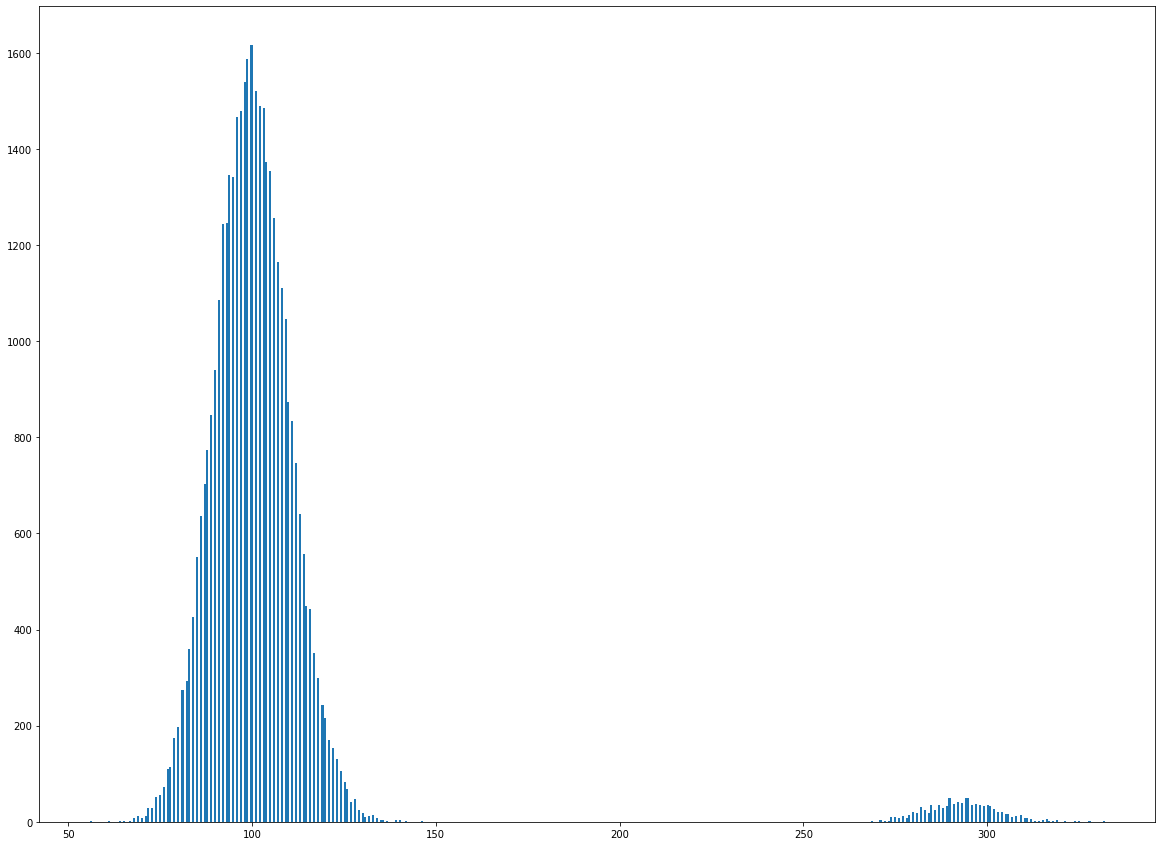

In [144]:
distWBad=dist.copy()
for i in range(0,1000):
    distWBad[i]=dist[i]+193
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(distWBad,bins=500)
plt.show()

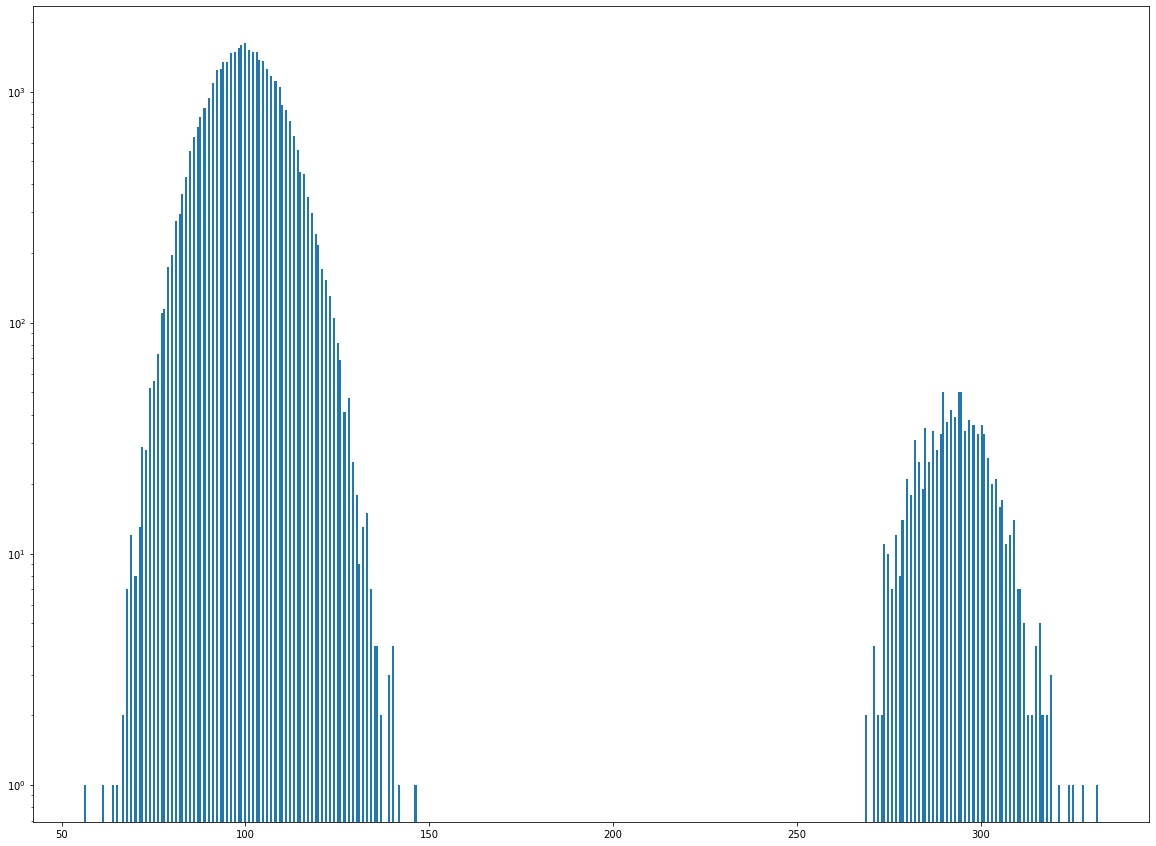

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(distWBad,bins=500)
ax.set_yscale('log')
plt.show()

I did want to make note, as it will become important later, the shape of the log-scale distribution. While it is true that a Poisson distribtuion with a large $\mu$ is approximately Gaussian, it is not perfectly Guassian. This is much more obvious once we look at the histogram of the log-scale distribution as we take note of the non-symmetrical tail to the right of the mean. In the above, it is far more obvious in the right-hand 'parabola'.

### Part A
In the above, we can clearly see the 1000 values which were selected to have 193 added to them - it's the small distribution to the right. 

We can make an educated guess stating that the mean of this smaller distribution is 293. The reason for this is because the most common value that would be selected from the original distribution would be 100 (because that's the mean), and each value had 193 added to it.  

I would expect the brightness of my signal to be equivalent to the ratio of the areas. In this case, it would be 1/40th the brightness because I took a random sampling of 1000 from a total of 40000 signals.

It is biased, because it is Gaussian-like (not perfectly Gaussian, we are still working with a Poisson distribution) and so it is not perfectly symmetrical. 

### Part B 
The observed value is stronger than the true injected signal. It wouldn't make sense if the observed value's mean was the same as the injected value, nor would it make sense if it was less than the injected value.  

This is because there is already signal (the background) so we should not expect the observed signal's mean to be anywhere other than *the mean of the original* + *the injected value*. Related to this, the values that create the resulting distribution will also be as evenly distributed around the observed value's mean as they were around the original mean of 100. 

The distribution of the observed signal is Poisson. A randomly selected subset of a distribution is going to be the same distribution as the pool it was selected from. 

The distribution you're drawing from is made up of values that have some probability of existing, which is quantified by occurence. If you randomly select from that distribution, those values have the same probability of being selected as they did existing because they occur more frequently than the other values. The Liklihood of randomly selecting the other values is proportional to their probabilities. Because of this, the subset will have the same distribution as the main set.

## Problem 3

### Part A
In this problem, we will be exploring the effects of injecting a range of signals into our background data. The range should be anywhere between 0$\sigma$ and 30$\sigma$+. 

To do this, I will generate a random list of 1000 integers on a scale of 0-300. 

In [146]:
vals=[]
for i in range(0,1000):
    vals.append(np.random.randint(0,high=300))

Below shows a 2D histogram of the injected signal vs observed signal. 

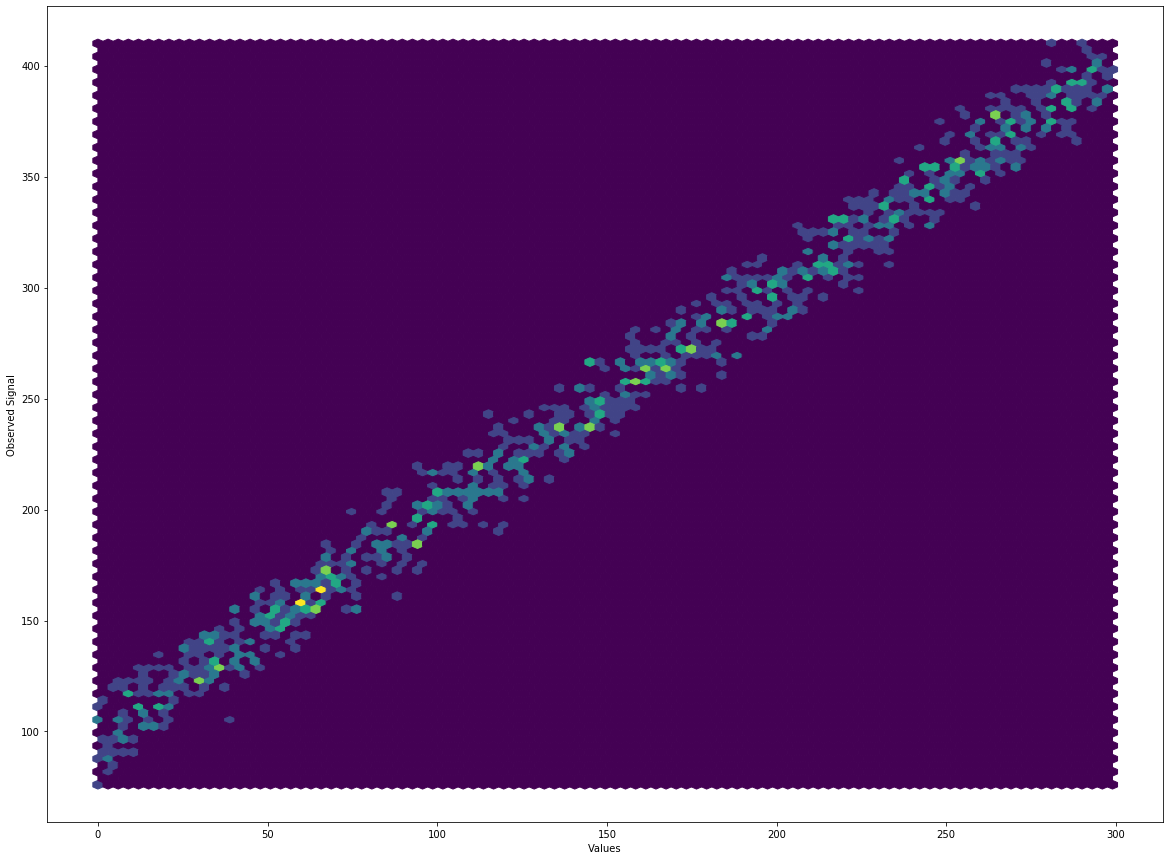

In [165]:
distBadObs=[]
for i in range(0,1000):
    newDistVal=dist[i]+vals[i]
    distBadObs.append(newDistVal)
fig, ax = plt.subplots(1, 1, figsize=(20,15))
plt.hexbin(vals,distBadObs)
plt.xlabel("Values")
plt.ylabel("Observed Signal")
plt.show()

And so when we graph a 2D distribution of the injected signals with the observed background, we get a line.   

In this problem, we have simulated the relationship between injected values and observed background. This gives us a good visual representation to reference when we're hunting for a signal. We can also use this in the other direction: if we know a certain injected value, which is likely a signal of interest, and we have the visual representation of the observed signal vs the injected signal, then we can find reasonable values of background noise to remove from our distributions in order to get a more accurate representation of our data. 

### Part B  
The value chosen in problem 2 is present in this problem (I chose a range of 0-300).   

We can clearly see that the same result was produced with the 2D graph. Along the x-axis are the values injected. If you find the value of 193 (or approximately where it's at), you will find that the range at that point (as seen by the values of the y-axis) are approximately the same as the x-axis range around 293 that we see in the graph in Problem 2. 

### Part C  
We want to ask the statistical question:  
Given some 2D histogram relating injected signal with observed background, what would the injected signal be given some observed background?

I will choose an observed value of 400. 

If we look at the 2D graph above, we could expect an injectd value of about 300. If we graph a proper representation of the pdf(), we should see the mean at 300. 

The graph below is a representation of the injected signal without the background.

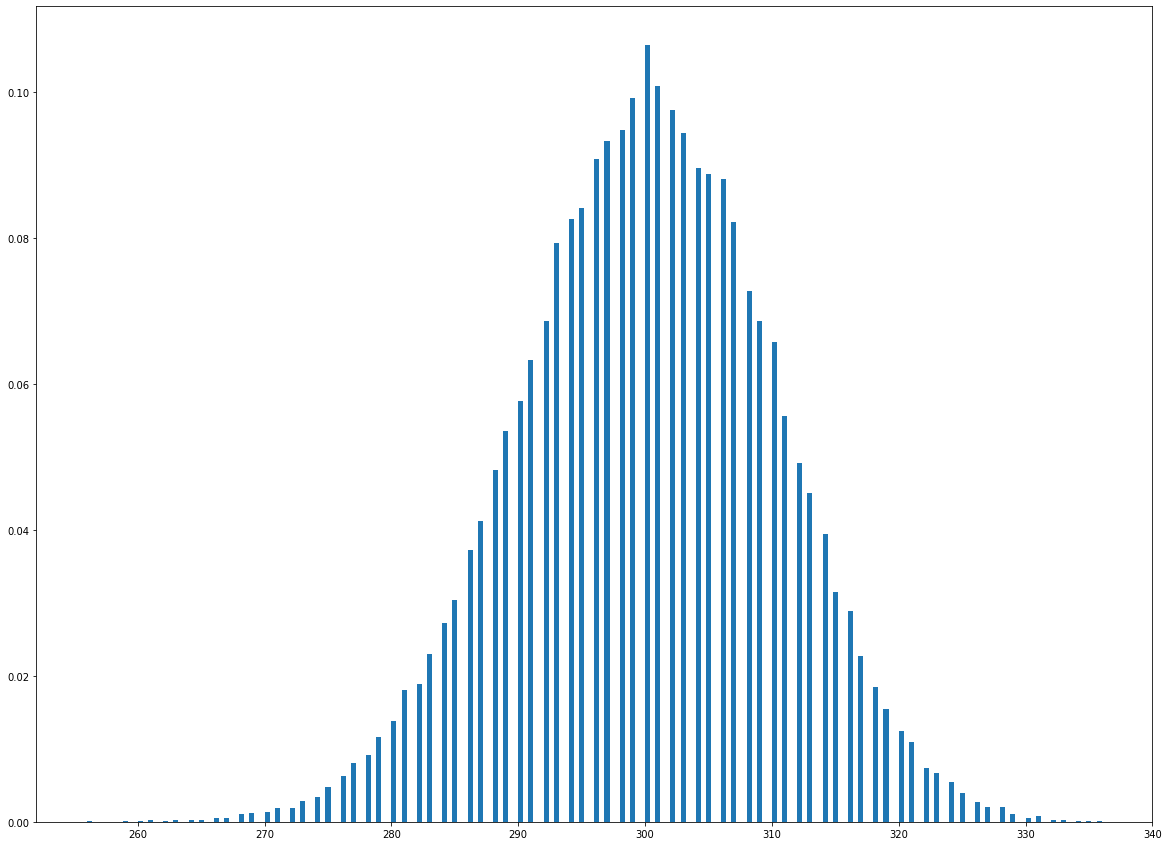

In [195]:
obs=[400]*40000
noise = np.random.poisson(mu1,40000)
inject = obs - noise
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(inject,bins=200, density=True)
plt.show()

### Part D  
In this part we ask the question: Given our signal, what is our 1$\sigma$ uncertainty on the true signal strength.   

We know that our true signal strength is 300.  

We can also state that, because it is a Poisson distribution with a large $\mu$, that the distribution is approximately, and sufficiently, Gaussian to suggest that it is nearly-symmetric about the mean.  

With these things known, we can then do the math to find that our 1$\sigma$ uncertainties are approximately: 282 and 317


Math below:

In [193]:
prob=stats.poisson.cdf(317,mu=300)
print(f"Upper bound sigma at a signal of 317:{stats.norm.ppf(prob)}")
prob=stats.poisson.cdf(282,mu=300)
print(f"Lower bound sigma at a signal of 282:{stats.norm.ppf(prob)}")

Upper bound sigma at a signal of 317:1.0103061272218794
Lower bound sigma at a signal of 282:-1.0107100701619562


### Part E  
As stated previously, as $\mu$ gets large in a Poisson distribution, the distribution tends toward Gaussian. 

As noted, the upper and lower bounds are not exactly symmetrical about the mean. We have +17 for the upper bound and -18 for the lower bound. This does make sense, because we are dealing with a Poisson distribution, all things considered.  

It also does make sense that the upper bound is farther away from the mean than the lower bound because of the nature of a Poisson distribution having a larger 'tail' to the right of the mean (again, this was pointed out in the log-scale distribution of problem 2's visualization). 

## Problem 4
We will now explore along a similar vein, but with a weak signal within the 1$\sigma$ range. Of note, the signal to be used is 110.  

### Part A

In [229]:
prob1=stats.poisson.cdf(110, mu=mu1)
ppf1 = stats.norm.ppf(prob1)
print(ppf1)

1.0487901826019261


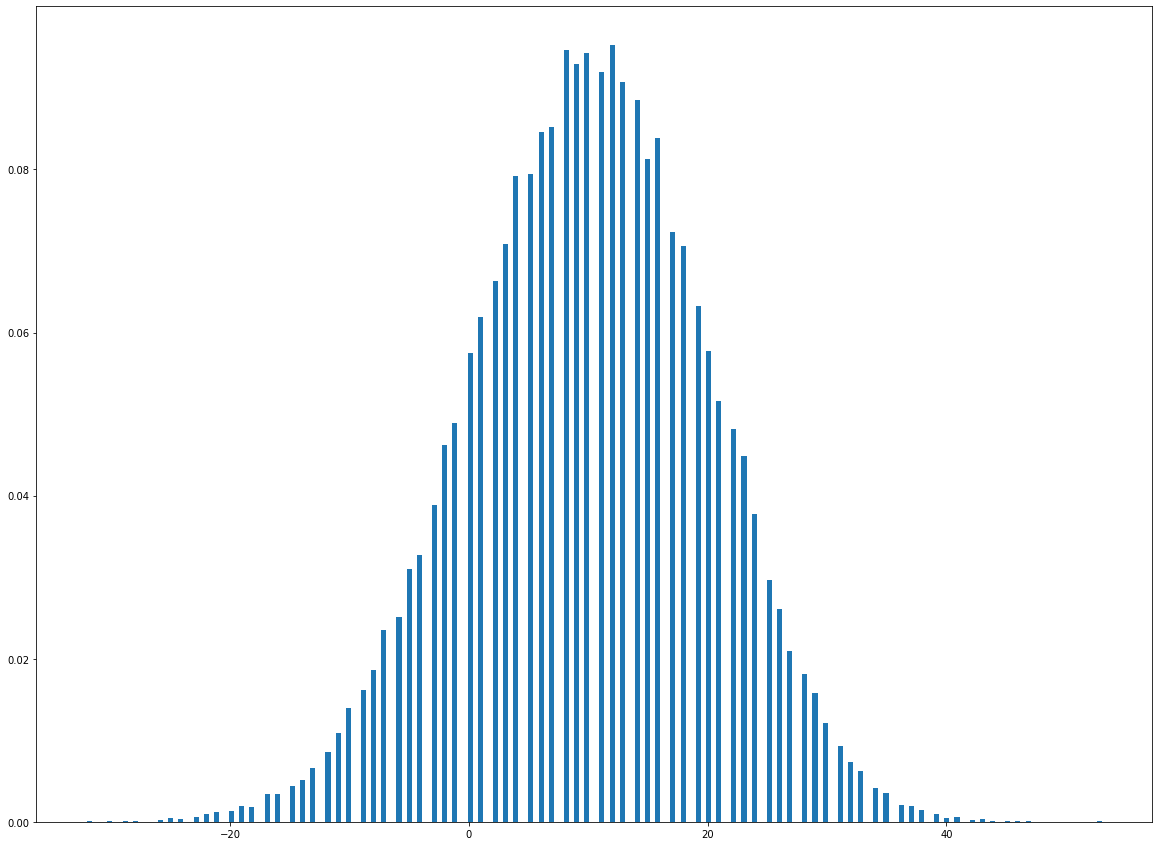

In [230]:
obs=[110]*40000
noise = np.random.poisson(100,40000)
inject = obs - noise
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(inject,bins=200, density=True)
plt.show()

Because our Poisson distribution is approximately Gaussian, due to $\mu$=100, we show negative values above. 

However, we are still working with a Poisson distribtuion, and so negative numbers are not valid. And so, the only values that we should take into consideration is any value greater than 0:

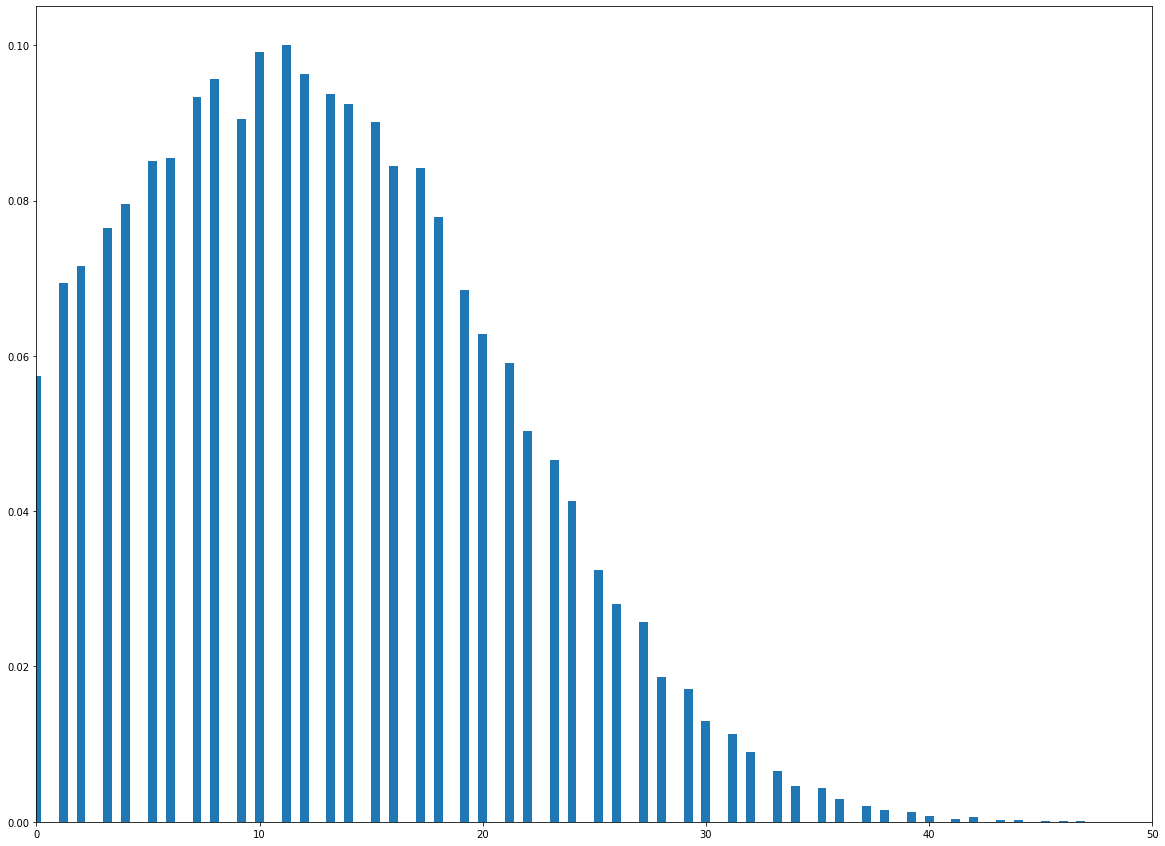

In [231]:
obs=[110]*40000
noise = np.random.poisson(100,40000)
inject = obs - noise
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(inject,bins=200, density=True)
plt.xlim(0,50)
plt.show()

### Part B  
Ideally, I shouldn't have needed to cut the x-axis, and this should have just stopped at 0 (because it's a Poisson distribution). 
The fact that it does approach (and technically pass) zero means that there is some noise that is considerably brighter than our true values. We may need to think about this when working with other data: If we are looking for a weak signal, we need to take the possibility of there existing negative values in our pdf(). Otherwise, we may miss the signal we're hunting for. 

### Part C  
As the statistical question:  
If I observe a candidate signal of 110, and it's too weak to claim a detection, the true value would be less than what value 95% of the time? 

To proceed, we will do the following:

In [301]:
print(stats.poisson.ppf(q=.95,mu=10,loc=5))

20.0


With the above, we know that the true value will be less than 20 95% of the time.